In [45]:
import numpy as np
import datetime as dt
import json
import time
import pandas as pd
import csv
import pprint
import re
import sys
from collections import Counter
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
# pd.options.display.max_rows = 9000
# import warnings
# warnings.filterwarnings('ignore') 
# %load_ext autoreload
# %autoreload 2

In [5]:
full_text_data = pd.read_csv('tweets.csv', header='infer')

In [29]:
def find_hashtags(string:str)->list:
    search_regex = "#\w+"
    found_items = re.findall(search_regex, string)
    return found_items

In [6]:
full_text_data

,tweets
0,Biden a professional debater?? Hardly!! More ...
1,#PresidentialDebate #Debates2020 #TrumpIsANati...
2,How can Biden stand a chance against Trump in ...
3,Very reminiscent of pre-2018 election raids th...
4,Why was Corrupt Biden’s son being paid MILLION...
5,"At 9pm ET tonight, @JoeBiden will face off aga..."
6,If Joe Biden can't debate Donald Trump for 90 ...
7,Thank you #Truckers4Trump!
8,Let's get this straight: Hillary manufactured ...
9,O tanto de meme que nascerá hoje... vou morrer...


In [9]:
with open('first_half_annotated.json', 'r') as first_half:
    fread = first_half.read()
    first_half_hashtag_sentiment = json.loads(fread)

with open('second_half_hashtags_annotated.json', 'r') as first_half:
    fread = first_half.read()
    second_half_hashtag_sentiment = json.loads(fread)

In [12]:
first_half_hashtag_sentiment['#presidentialcandidate']

{'0': '#LatinosWithTrump',
 '1': '#SaveOurChildren',
 '2': '#PromisesMadePromisesKept',
 '3': '#StudentFilm',
 '4': '#p2',
 '5': '#HOME',
 '6': '#DueProcess',
 '7': '#WhiteHouse',
 '8': '#BidenLiesAgain',
 '9': '#Resist',
 '10': '#Monitor',
 '11': '#DemocratsCheat',
 '12': '#TheNengiEra',
 '13': '#world',
 '14': '#WeSpeechies',
 '15': '#TraitorTot',
 '16': '#GeorgeSoros',
 '17': '#amazinglyselfishanddangerous',
 '18': '#drugtest',
 '19': '#VirginiaIsForVoters',
 '20': '#BrokeAssPresident',
 '21': '#abortion',
 '22': '#chriswallace',
 '23': '#BoycottNewscorp',
 '24': '#VoteRedToSaveAmerica',
 '25': '#IlhanOmar',
 '26': '#HandUPnotHandOUTS',
 '27': '#PrayForPOTUS',
 '28': '#economic',
 '29': '#BlueLivesMatter',
 '30': '#recebtayyiperdoğan',
 '31': '#NC08',
 '32': '#ProjectHope',
 '33': '#PhonyKamala',
 '34': '#2020Debate',
 '35': '#EarCannalCheck',
 '36': '#bluewave',
 '37': '#RiseAppalachia',
 '38': '#TrumpSociopath',
 '39': '#NotHisFather',
 '40': '#ELN',
 '41': '#JoeBIDEN',
 '42': '#d

In [14]:
first_half_hashtag_sentiment['0']

{'0': 1,
 '1': 0,
 '2': 1,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 1,
 '7': 1,
 '8': 1,
 '9': -1,
 '10': -1,
 '11': 1,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': -1,
 '16': 1,
 '17': -1,
 '18': 1,
 '19': 0,
 '20': -1,
 '21': -1,
 '22': -1,
 '23': 1,
 '24': 1,
 '25': -1,
 '26': 1,
 '27': 1,
 '28': 1,
 '29': 1,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 1,
 '34': 0,
 '35': 0,
 '36': -1,
 '37': 0,
 '38': -1,
 '39': -1,
 '40': 0,
 '41': -1,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': -1,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 1,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 1,
 '55': 1,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 1,
 '61': 0,
 '62': 0,
 '63': -1,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': -1,
 '73': -1,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': -1,
 '80': 0,
 '81': 0,
 '82': -1,
 '83': -1,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 1,
 '90': 0,
 '91': 1,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': -1,


In [15]:
first_half_hashtags_reorged = dict()

for i in range(len(first_half_hashtag_sentiment['#presidentialcandidate'])):
    first_half_hashtags_reorged[first_half_hashtag_sentiment['#presidentialcandidate'][str(i)]] = first_half_hashtag_sentiment['0'][str(i)]

In [17]:
def Merge(dict1, dict2):
    return(dict2.update(dict1))

In [18]:
merged_hashtags_sentiment = Merge(first_half_hashtags_reorged, second_half_hashtag_sentiment)

In [22]:
len(second_half_hashtag_sentiment)

6859

In [37]:
hashtag_sentiment_sums = full_text_data['tweets'].apply(find_hashtags).values

In [38]:
hashtag_sentiment_sums

array([list([]),
       list(['#PresidentialDebate', '#Debates2020', '#TrumpIsANationalDisgrace']),
       list(['#VarneyCo', '#2020Debate']), ..., list([]), list([]),
       list(['#NY21'])], dtype=object)

In [39]:
for i in range(len(hashtag_sentiment_sums)):
    current_sums = 0
    try:
        for v in hashtag_sentiment_sums[i]:
            current_sums += int(second_half_hashtag_sentiment[v])
    except:
        pass
    hashtag_sentiment_sums[i] = current_sums 

In [57]:
hashtag_sentiment_keys = []
hashtag_sentiment_values = []
for i in dict(Counter(hashtag_sentiment_sums)).items():
    hashtag_sentiment_keys.append(i[0])
    hashtag_sentiment_values.append(i[1])

In [69]:
df_sentiment_value_cts = pd.DataFrame(data=hashtag_sentiment_values, index=hashtag_sentiment_keys)
df_sentiment_value_cts = df_sentiment_value_cts.sort_index()

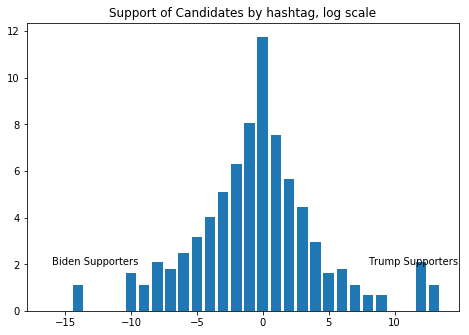

In [101]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df_sentiment_value_cts.index.values,np.log(df_sentiment_value_cts[0].values))
plt.text(-16, 2, 'Biden Supporters')
plt.text(8, 2, 'Trump Supporters')
plt.title('Support of Candidates by hashtag, log scale')
plt.show()